# Lista 1

## zadanie 1

In [4]:
import requests
import pandas as pd
from io import StringIO

# URL do pliku
url = 'https://prac.im.pwr.edu.pl/~wyloman/szcz_2024_2025/zad1_lista1.txt'

# Pobranie danych z wyłączoną weryfikacją SSL
response = requests.get(url, verify=False)

# Ostrzeżenie o wyłączonym SSL
import warnings
warnings.filterwarnings('ignore')

# Sprawdzenie, czy pobranie się powiodło
if response.status_code == 200:
    data = response.text
else:
    print(f'Błąd pobierania pliku: {response.status_code}')

# Wczytanie danych do DataFrame
df = pd.read_csv(StringIO(data), delim_whitespace=True, header=None)

# Nadanie nazw kolumnom (jeśli potrzebne)
df.columns = ['X', 'Y']

# Wyświetlenie pierwszych kilku wierszy danych
print(df.head())



          X          Y
0  0.204906  -3.220550
1  0.098946  -1.125868
2  2.063672  12.928829
3  0.090608   6.917862
4  0.458298  -0.604774


In [8]:
X, Y = df['X'], df['Y']

In [11]:
import matplotlib.pyplot as plt, numpy as np
from scipy.optimize import curve_fit

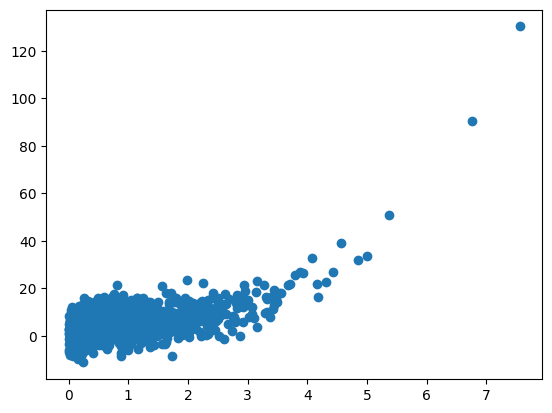

In [9]:
plt.scatter(X, Y)

In [12]:
def model(x, a, b):
    return a*np.exp(b*x)

In [13]:
popt, pcov = curve_fit(model, X, Y)
a, b = popt
print(f'Y = {a:.3f} * exp({b:.3f} * X)')

Y = 2.990 * exp(0.500 * X)


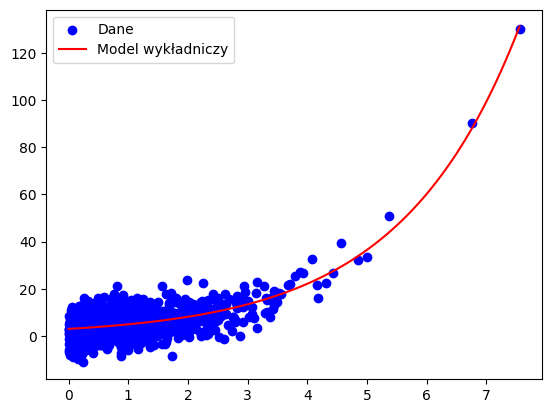

In [15]:
# Rysowanie wykresu rozproszenia
plt.scatter(X, Y, label='Dane', color='blue')

# Rysowanie dopasowanej funkcji wykładniczej
X_fit = np.linspace(min(X), max(X), 100)
Y_fit = model(X_fit, *popt)
plt.plot(X_fit, Y_fit, label='Model wykładniczy', color='red')
plt.legend()